In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

In [2]:
# Loading the data set and also viewing it
product_df = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
district_df = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')

print("This is the products data sample:- ")
print(product_df.head())

print("This is the districts data sample:- ")
print(district_df.head())

This is the products data sample:- 
   LP ID                           URL  Product Name  Provider/Company Name  \
0  13117    https://www.splashmath.com   SplashLearn          StudyPad Inc.   
1  66933          https://abcmouse.com  ABCmouse.com  Age of Learning, Inc    
2  50479         https://www.abcya.com        ABCya!         ABCya.com, LLC   
3  92993         http://www.aleks.com/         ALEKS    McGraw-Hill PreK-12   
4  73104  https://www.achieve3000.com/   Achieve3000            Achieve3000   

            Sector(s)                         Primary Essential Function  
0             PreK-12                    LC - Digital Learning Platforms  
1             PreK-12                    LC - Digital Learning Platforms  
2             PreK-12  LC - Sites, Resources & Reference - Games & Si...  
3  PreK-12; Higher Ed                    LC - Digital Learning Platforms  
4             PreK-12                    LC - Digital Learning Platforms  
This is the districts data sample:- 
  

In [3]:
product_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [4]:
# Data type checking and handling missing values for the products data set
print("Data Types of the Products Data:- ")
print(product_df.dtypes)

print("\n Missing Values in Product Data:- ")
print(product_df.isnull().sum())
# Data type checking and handling missing values for the district data set
print("\nData Types of the District Data:- ")
print(district_df.dtypes)

print("\n Missing values in the District data:- ")
print(district_df.isnull().sum())




Data Types of the Products Data:- 
LP ID                          int64
URL                           object
Product Name                  object
Provider/Company Name         object
Sector(s)                     object
Primary Essential Function    object
dtype: object

 Missing Values in Product Data:- 
LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

Data Types of the District Data:- 
district_id                  int64
state                       object
locale                      object
pct_black/hispanic          object
pct_free/reduced            object
county_connections_ratio    object
pp_total_raw                object
dtype: object

 Missing values in the District data:- 
district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced  

In [5]:
# Let's find out the most common state in the districts data frame so that we can replace the null values in the data frame with the common state
most_common_state = district_df['state'].mode()[0]

# Fill missing values in the 'state' column with the most common state
district_df['state'].fillna(most_common_state, inplace=True)


/tmp/ipykernel_13/3109345099.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  district_df['state'].fillna(most_common_state, inplace=True)


In [6]:
#Lets check that the districts data set containing the state does or does not containing null values in it 
print("Missing values in districts data after filling the state column")
print(district_df['state'].isnull().sum())
print("Lets check the whole districts dataframe now")
print(district_df.isnull().sum())

Missing values in districts data after filling the state column
0
Lets check the whole districts dataframe now
district_id                   0
state                         0
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64


In [7]:
# Now lets switch to the product data frame
'''Lets fill up the missing 'Provider/Company Name' values with 'Unknown' 
Then after that fill missing sector and primary essential function values with the most common values
and then check for the missing values in the products dataframe after filling

'''
product_df['Provider/Company Name'].fillna('Unknown', inplace = True)

product_df['Sector(s)'].fillna(product_df['Sector(s)'].mode()[0], inplace=True)
product_df['Primary Essential Function'].fillna(product_df['Primary Essential Function'].mode()[0], inplace=True)
missing_values_product = product_df.isnull().sum()
missing_values_relevant_columns = missing_values_product[["Provider/Company Name", "Sector(s)", "Primary Essential Function"]]

print("Missing Values in Products Data After Handling:")
print(missing_values_relevant_columns)

Missing Values in Products Data After Handling:
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64


/tmp/ipykernel_13/2846725925.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df['Provider/Company Name'].fillna('Unknown', inplace = True)
/tmp/ipykernel_13/2846725925.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [8]:
#Lets perform the Digital Learning analysis
sector_counts = product_df['Sector(s)'].value_counts()
function_counts = product_df['Primary Essential Function'].value_counts()

#Display the counts for sectors and primary essential functions
print("Counts of Product by Sector:")
print(sector_counts)

print("\nCounts of Product by primary essential function: ")
print(function_counts)

Counts of Product by Sector:
Sector(s)
PreK-12                          190
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: count, dtype: int64

Counts of Product by primary essential function: 
Primary Essential Function
LC - Digital Learning Platforms                                              94
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Inst

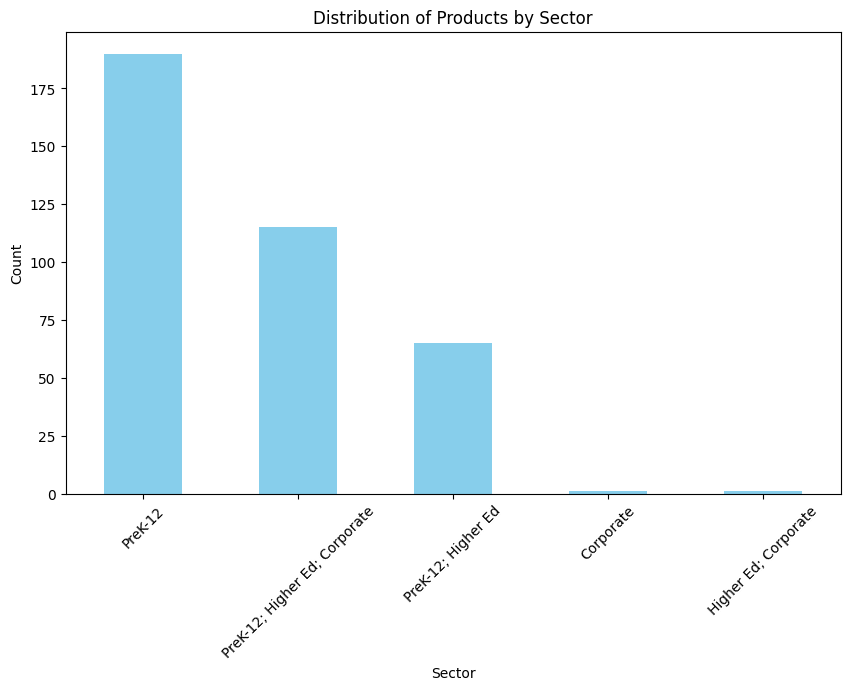

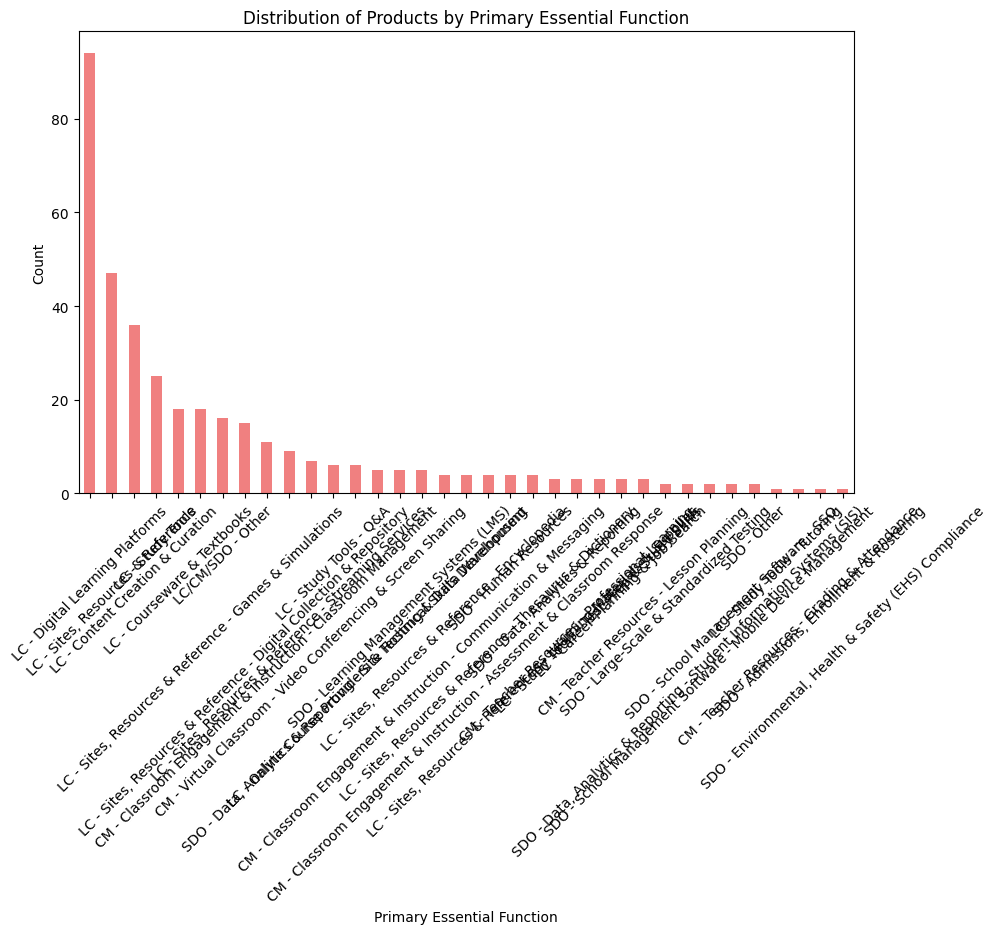

In [9]:
import matplotlib.pyplot as plt

# Visualize the distribution of products by sector
plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of products by primary essential function
plt.figure(figsize=(10, 6))
function_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Products by Primary Essential Function')
plt.xlabel('Primary Essential Function')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Combine the two dataframes into one for analysis
combined_df = pd.concat([sector_counts, function_counts], axis=1)
combined_df.columns = ['Products by Sector', 'Products by Primary Essential Function']

# Display the combined dataframe
print(combined_df)


                                                    Products by Sector  \
PreK-12                                                          190.0   
PreK-12; Higher Ed; Corporate                                    115.0   
PreK-12; Higher Ed                                                65.0   
Corporate                                                          1.0   
Higher Ed; Corporate                                               1.0   
LC - Digital Learning Platforms                                    NaN   
LC - Sites, Resources & Reference                                  NaN   
LC - Content Creation & Curation                                   NaN   
LC - Study Tools                                                   NaN   
LC - Courseware & Textbooks                                        NaN   
LC - Sites, Resources & Reference - Games & Sim...                 NaN   
LC/CM/SDO - Other                                                  NaN   
LC - Sites, Resources & Reference - Di

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [11]:
# Combine the two dataframes into one for analysis
combined_df = pd.concat([sector_counts, function_counts], axis=1)
combined_df.columns = ['Products by Sector', 'Products by Primary Essential Function']

# Group the data by sector and primary essential function and count the occurrences
grouped_df = product_df.groupby(['Sector(s)', 'Primary Essential Function']).size().unstack(fill_value=0)

# Display the breakdown of primary essential functions by sector
print("Breakdown of Primary Essential Functions by Sector:")
print(grouped_df)

Breakdown of Primary Essential Functions by Sector:
Primary Essential Function     CM - Classroom Engagement & Instruction - Assessment & Classroom Response  \
Sector(s)                                                                                                  
Corporate                                                                      0                           
Higher Ed; Corporate                                                           0                           
PreK-12                                                                        1                           
PreK-12; Higher Ed                                                             0                           
PreK-12; Higher Ed; Corporate                                                  3                           

Primary Essential Function     CM - Classroom Engagement & Instruction - Classroom Management  \
Sector(s)                                                                                     